# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Importing the dataset

In [2]:
data=pd.read_csv(r"F:\ML- Codes\Machine_learning\Regresstion\Position_Salaries.csv")

Checking for null values

In [3]:
print(data.isna().sum())

Position    0
Level       0
Salary      0
dtype: int64


In [4]:
print(data.head())

            Position  Level  Salary
0   Business Analyst      1   45000
1  Junior Consultant      2   50000
2  Senior Consultant      3   60000
3            Manager      4   80000
4    Country Manager      5  110000


Removing duplicates....

In [5]:
print(data.size)

30


Dividing dataset into dependent and independent data

In [6]:
X=data.iloc[:,1:-1].values
Y=data.iloc[:,-1].values

We don't need to do the spliting here because we have vary less data which is 10 rows only.


# Feature Scaling...

In [7]:
from sklearn.preprocessing import StandardScaler
scx=StandardScaler()
Xsc=scx.fit_transform(X)
scy=StandardScaler()
Ysc=scy.fit_transform(Y.reshape(-1,1))

# Preparing Polynomial Regression model...

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
pf=PolynomialFeatures(degree=8)
X1=pf.fit_transform(Xsc)
Lr=LinearRegression()
Lr.fit(X1,Ysc)

LinearRegression()

Predicting the test data by using Regression model

In [9]:
y_pred = Lr.predict(X1)
y_predicts = scy.inverse_transform(y_pred.reshape(-1, 1))

Comparing the original and predicted data.....

In [10]:
print(np.concatenate((Y.reshape(len(Y),1),y_predicts.reshape(len(y_pred),1)),axis=1))

[[  45000.           45010.38667215]
 [  50000.           49906.51995064]
 [  60000.           60373.92019745]
 [  80000.           79127.51953929]
 [ 110000.          111308.72069107]
 [ 150000.          148691.27930893]
 [ 200000.          200872.48046072]
 [ 300000.          299626.07980255]
 [ 500000.          500093.48004936]
 [1000000.          999989.61332785]]


Predicting random_data....

In [11]:
print(scy.inverse_transform(Lr.predict(pf.transform(scx.transform([[8.5]])))))

[[381160.70844743]]


## Visualizing the model..

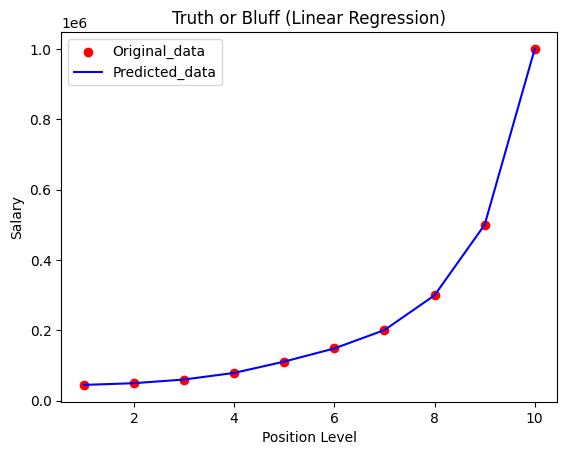

In [12]:
plt.scatter(X,Y,color="red",label="Original_data")
plt.plot(X,y_predicts,color="blue",label="Predicted_data")
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.legend()
plt.show()

## Visualising the SVR results (for higher resolution and smoother curve)

C:\Users\vishn\AppData\Local\Temp\ipykernel_23020\1085959317.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x_grid=np.arange(min(X),max(X),0.1)
C:\Users\vishn\AppData\Local\Temp\ipykernel_23020\1085959317.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


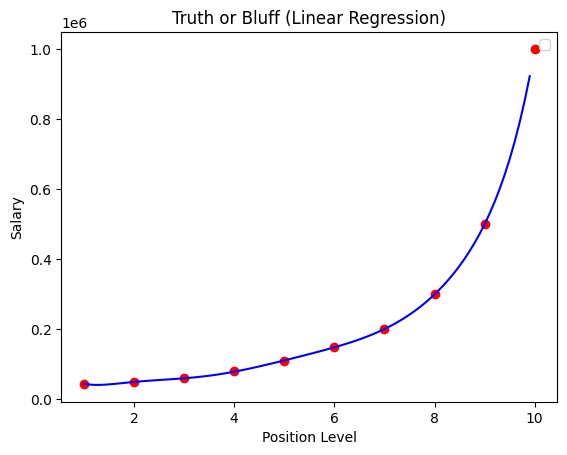

In [13]:
x_grid=np.arange(min(X),max(X),0.1)
x_grid=x_grid.reshape(-1,1)
plt.scatter(X,Y,color="red")
plt.plot(x_grid,scy.inverse_transform(Lr.predict(pf.transform(scx.transform(x_grid)))),color="blue")
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.legend()
plt.show()

In [14]:
from sklearn.metrics import r2_score
print(r2_score(Y,y_predicts))

0.9999934972438328
